<a href="https://colab.research.google.com/github/Tarnished2/DataScientist/blob/main/MachineLearning/14.ClassificationModelValidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pramaditya Ardian Saputra

# Classification Model Validation

### Permasalahan

> Churn adalah salah satu peristiwa atau perilaku pelanggan beralih dari produk setelah (dalam jangka waktu tertentu) berlangganan produk. Produk dapat berupa barang atau jasa, seperti jaringan internet, penyedia telekomunikasi, dan sejenisnya. Dalam hal ini produk yang dianalisa adalah perusahaan telekomunikasi. Skema churn dapat dijelaskan dalam beberapa tahap. Tahap pertama, tahap ketika pelanggan berlangganan produk. Tahap kedua, yaitu rutinitas, atau perilaku pelanggan atau umpan balik pelanggan terhadap produk yang digunakan selama periode tertentu. Setelah itu, pada tahap ketiga, ada dua jenis, retensi (berlangganan kembali) atau churn (beralih atau berhenti berlangganan). Setiap perusahaan pasti ingin meminimalkan churn dan memaksimalkan retensi. Salah satu solusi yang dapat digunakan adalah dengan menggunakan prediksi churn pelanggan. Dengan ini, perusahaan dapat mengetahui karakteristik yang cenderung beralih atau berhenti berlangganan.

### Deskripsi Data

1.   Gender: Jenis kelamin pelanggan (Male, Female)
2.   Partner: Status pernikahan pelanggan (yes, no)
3.   Tenure: Lama beralangganan (integer; bulan)
4.   PhoneService: Apakah pelanggan menggunakan telfon (yes, no)
5.   PaperlessBilling:  Apakah pelanggan menggunakan paperless billing (yes, no)
6.   MonthlyCharges: Biaya bulanan (numeric; usd)
7.   Churn: Apakah pelanggan berhenti berlangganan atau tidak (yes, no)

> Dalam kasus ini kita akan melakukan prediksi Churn sebagai variabel respon.




## 1. Import Libraries and Data

IMPORT PACKAGES

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Package
import os
import pandas as pd
import numpy as np

# Package untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Package untuk cleaning, modelling, dan evaluation model
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, KFold, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Membuat path untuk mengidentifikasi letak directory
# Catatan : pastikan path yang anda masukkan sesuai dengan directory data anda. Kemungkinan besar path di contoh ini berbeda dengan penyimpanan data anda
# path = '/content/drive/MyDrive/Meet 3 Binary Classification/Data/'
path = '/content/drive/MyDrive/SIB/5. Supervised Machine Learning - Classification/5.2 Classification Model Validation/'

IMPORT DATA

In [ ]:
# Load data
# df = pd.read_csv(os.path.join(path, "loan_prediction.csv"), encoding='utf-8', index_col='Loan_ID')
df = pd.read_csv(path + 'TelcoChurn.csv')
df.head()

,gender,Partner,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn
0,Female,Yes,1,No,Yes,29.85,No
1,Male,No,34,Yes,No,56.95,No
2,Male,No,2,Yes,Yes,53.85,Yes
3,Male,No,45,No,No,42.30,No
4,Female,No,2,Yes,Yes,70.70,Yes


Dari data diatas maka bisa didapat keterangan bahwa

x = gender, Partner, tenure, PhoneService, PaperlessBilling, MonthlyCharges

y = Churn

## 2. Exploratory Data Analysis (EDA)

Lakukan eksplorasi data churn!

In [ ]:
# Cek informasi yang terdapat di data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   Partner           7043 non-null   object 
 2   tenure            7043 non-null   int64  
 3   PhoneService      7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 385.3+ KB


mencari tahu apakah banyak yang melakukan churn?

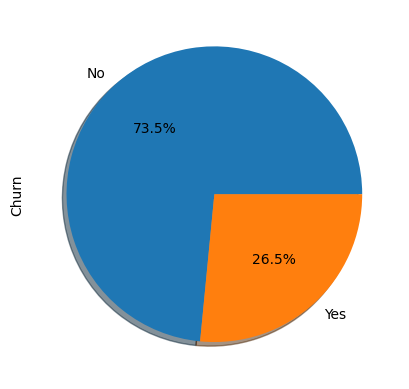

In [ ]:
# Mencari perbandingan label/class
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

In [ ]:
# Analisa deskriptif
df.describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


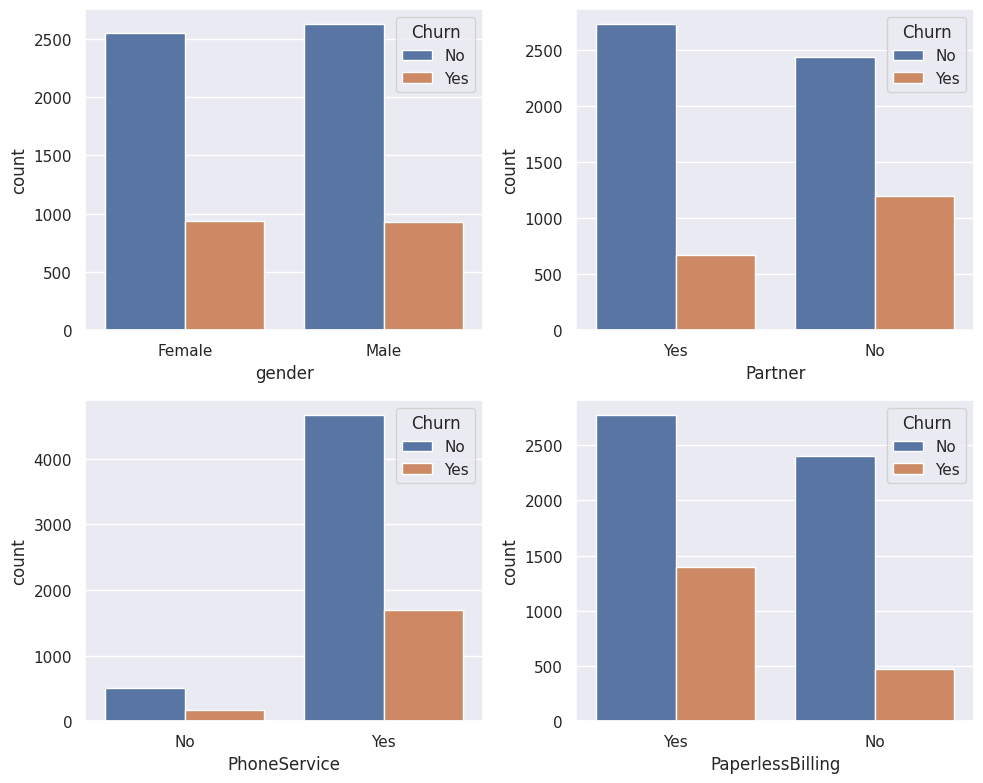

In [ ]:
sns.set(style='darkgrid')

fig, ax = plt.subplots(2,2, figsize=(10,8))

sns.countplot(data=df, x='gender', hue='Churn', ax=ax[0,0])
sns.countplot(data=df, x='Partner', hue='Churn', ax=ax[0,1])
sns.countplot(data=df, x='PhoneService', hue='Churn', ax=ax[1,0])
sns.countplot(data=df, x='PaperlessBilling', hue='Churn', ax=ax[1,1])
plt.tight_layout()
plt.show()

Dari visualisasi diatas didapatkan

1. Pada kolom 1 baris 1 didapat laki-laki dan perempuan banyak yang tidak berhenti berlangganan, tetapi pelanggan yang banyak berhenti berlangganan adalah laki-laki
2. Pada kolom 2 baris 1 didapat orang yang banyak berhenti berlangganan adalah orang yang sudah menikah dan orang yang banyak berhenti berlangganan adalah orang yang belum menikah
3. Pada kolom 1 baris 2 didapatkan pelanggan yang menggunakan telfon banyak yang tidak berhenti berlangganan
4. Pada kolom 2 baris 2 didapatkan pelanggan yang menggunakan paperless billing banyak yang tidak berhenti berlanganan

## 3 Preprocessing

Lakukan preprocessing data churn!

### 3.1. Missing value

In [ ]:
# cek missing value
df.isnull().sum()

gender              0
Partner             0
tenure              0
PhoneService        0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

Dari hasil cek missing value diketahui bahwa tidak ada missing value

### 3.2 Label Encoder

In [ ]:
kategori = ['gender','Partner','tenure','PhoneService','PaperlessBilling','MonthlyCharges', 'Churn']
df_cat = df[kategori]
df_cat.head()

,gender,Partner,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn
0,Female,Yes,1,No,Yes,29.85,No
1,Male,No,34,Yes,No,56.95,No
2,Male,No,2,Yes,Yes,53.85,Yes
3,Male,No,45,No,No,42.30,No
4,Female,No,2,Yes,Yes,70.70,Yes


In [ ]:
# Ubah kedalam bentuk numerik
encoded_data = LabelEncoder()

for feature in kategori:
        if feature in df.columns.values:
            df[feature] = encoded_data.fit_transform(df[feature])

df.head()

,gender,Partner,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn
0,0,1,1,0,1,142,0
1,1,0,34,1,0,498,0
2,1,0,2,1,1,436,1
3,1,0,45,0,0,266,0
4,0,0,2,1,1,729,1


### 3.3 Cek Korelasi

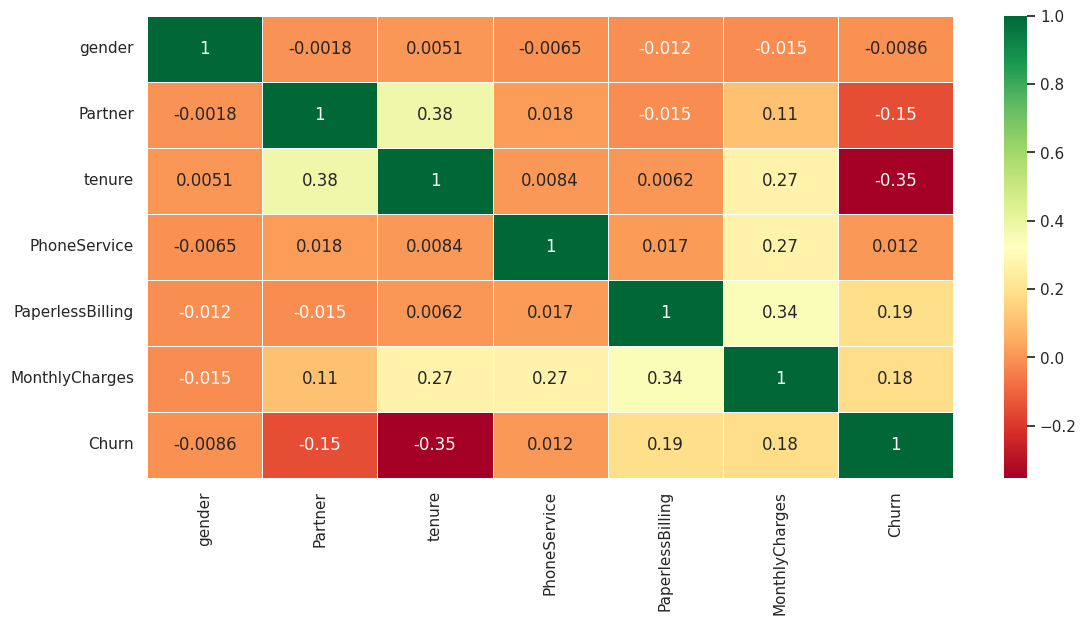

In [ ]:
# Melakukan perhitungan nilai korelasi dengan mengasumsikan data adalah data interval.
sns.heatmap(df.corr(),linewidths=.5,annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(13,6)
plt.show()

In [ ]:
# Cek Urutan korelasi terendah ke tertinggi
korelasi = df.corr()["Churn"].sort_values()
korelasi

tenure             -0.352229
Partner            -0.150448
gender             -0.008612
PhoneService        0.011942
MonthlyCharges      0.183523
PaperlessBilling    0.191825
Churn               1.000000
Name: Churn, dtype: float64

## 4. Feature Engineering

In [ ]:
df.head()

,gender,Partner,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn
0,0,1,1,0,1,142,0
1,1,0,34,1,0,498,0
2,1,0,2,1,1,436,1
3,1,0,45,0,0,266,0
4,0,0,2,1,1,729,1


### Scaling

In [ ]:
transformation_svm = MinMaxScaler().fit(df[['tenure','MonthlyCharges']])
df[['tenure','MonthlyCharges']]=transformation_svm.transform(df[['tenure','MonthlyCharges']])

df.head()

,gender,Partner,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn
0,0,1,0.013889,0,1,0.089646,0
1,1,0,0.472222,1,0,0.314394,0
2,1,0,0.027778,1,1,0.275253,1
3,1,0,0.625000,0,0,0.167929,0
4,0,0,0.027778,1,1,0.460227,1


## 5. Membangun Model Klasifikasi

MEMBAGI TRAIN TEST DATA

Menggunakan data testing berjumlah 30% dari total data, dan data training berjumlah 70% dari total data.

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X Train : ", len(X_train))
print("y Train : ", len(y_train))
print("X Test : ", len(X_test))
print("t Test : ", len(y_test))

X Train :  4930
y Train :  4930
X Test :  2113
t Test :  2113


### Stats Model (Logistic Regression)

In [ ]:
Input = sm.add_constant(X_train)

In [ ]:
model = sm.Logit(y_train, X_train, missing='drop')
result = model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.449885
         Iterations 7
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.219      
Dependent Variable: Churn            AIC:              4447.8689  
Date:               2023-04-07 15:06 BIC:              4486.8875  
No. Observations:   4930             Log-Likelihood:   -2217.9    
Df Model:           5                LL-Null:          -2838.9    
Df Residuals:       4924             LLR p-value:      2.4620e-266
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
gender            -0.1075   0.0712  -1.5102 0.1310 -0.2471  0.0320
Partner           -0.1451   0.0794  -1.8278 0.0676 -0

In [ ]:
# odds ratio
round(np.exp(result.params), 3)

gender               0.898
Partner              0.865
tenure               0.017
PhoneService         0.278
PaperlessBilling     1.557
MonthlyCharges      25.203
dtype: float64

Prediksi model

In [ ]:
prediction = result.predict(X_test)

In [ ]:
pred_results = pd.DataFrame(prediction, columns = ["logreg_pred"])
pred_results["prediksi"] = pred_results['logreg_pred'].apply(lambda x: 1 if x > 0.5 else 0)
pred_results['actual'] = y_test
pred_results.head()

,logreg_pred,prediksi,actual
185,0.603707,1,1
2715,0.045099,0,0
3825,0.013170,0,0
1807,0.589388,1,1
132,0.012539,0,0


Bagaimana akurasi model logistic regression dengan stats model?

In [ ]:
print('Test accuracy =  {:.3f}'.format(accuracy_score(pred_results['actual'], pred_results["prediksi"])))
print('Test precision =  {:.3f}'.format(precision_score(pred_results['actual'], pred_results["prediksi"], average='binary')))
print('Test recall =  {:.3f}'.format(recall_score(pred_results['actual'], pred_results["prediksi"], average='binary')))
print('Test f-score =  {:.3f}'.format(f1_score(pred_results['actual'], pred_results["prediksi"], average='binary')))

Test accuracy =  0.793
Test precision =  0.651
Test recall =  0.516
Test f-score =  0.575


### SKLEARN (Logistic Regression)

In [ ]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = LR.predict(X_test)
logreg_test = pd.merge(X_test, y_test, left_index=True, right_index=True, how='outer')
logreg_test['prediction'] = y_pred
logreg_test.head()

,gender,Partner,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,prediction
185,0,1,0.013889,0,1,0.055556,1,1
2715,1,0,0.569444,1,1,0.061237,0,0
3825,0,1,0.722222,1,0,0.010101,0,0
1807,0,0,0.013889,1,0,0.526515,1,1
132,1,0,0.930556,1,0,0.244318,0,0


Bagaimana akurasi model regresi logistik dengan SKLEARN?

In [ ]:
print('Accuracy of logistic regression classifier train data: {:.3f}'.format(LR.score(X_train, y_train)))
print('Accuracy of logistic regression classifier test data: {:.3f}'.format(LR.score(X_test, y_test)))

Accuracy of logistic regression classifier train data: 0.788
Accuracy of logistic regression classifier test data: 0.794


### Model Validation Logistic Regression SKLEARN

Bagaimana hasil model validation dengan KFold, StratifiedKFold, dan GridSearchCV?

KFold

In [ ]:
# Memilih k-fold (dipilih k = 5)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
scores = cross_val_score(logreg, X_train, y_train, cv=kfold)
print("Cross-validation scores: {:.3f}".format(scores.mean()))

Cross-validation scores: 0.787


Dari hasil cross validation dengan menggunakan k-fold didapat rata-rata score adalah 0,787 dimana terhitung sudah lumayan bagus. Mengalami penurunan dibanding hasil train sebelumnya, hal ini bisa saja dikarenakan persebaran train test data tidak merata untuk karakteristik tertentu. Untuk membuat hasil model lebih bagus lagi maka akan dilakukan tuning parameter untuk meningkatkan kinerja model.

In [ ]:
param_grid_lr = { 'C': [0.001, 0.01, 0.1, 1, 10, 100],
                 'class_weight':['balanced', None]}

grid_search_lr = GridSearchCV(logreg, param_grid_lr, cv=kfold)
grid_search_lr.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_lr.best_params_))
print("Best cross-validation score: {:.3}".format(grid_search_lr.best_score_))

Best parameters: {'C': 1, 'class_weight': None}
Best cross-validation score: 0.787


In [ ]:
scoring = {'acc': 'accuracy',
           'F1': 'f1',
           'prec': 'precision',
           'recall':'recall'}

acc = []
f1 = []
prec = []
recall = []

logreg = LogisticRegression(C = 10)
scores = cross_validate(logreg, X, y, cv=kfold, scoring=scoring)

acc.append(scores['test_acc'].mean())
f1.append(scores['test_F1'].mean())
prec.append(scores['test_prec'].mean())
recall.append(scores['test_recall'].mean())

print("Accuracy scores: ", acc)
print("f1 scores: ", f1)
print("Precision scores: ", prec)
print("Recall scores: ", recall)

Accuracy scores:  [0.7888675277437253]
f1 scores:  [0.5376729452005569]
Precision scores:  [0.641045701147062]
Recall scores:  [0.46321381726981714]


In [ ]:
# Terapkan pada data test
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)

print("Accuracy score: ", accuracy_score(predictions, y_test))
print("Recall score: ", recall_score(predictions, y_test))

Accuracy score:  0.7941315664931378
Recall score:  0.6707616707616708


In [ ]:
print('Accuracy of logistic regression classifier train data: {:.3f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier test data: {:.3f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier train data: 0.787
Accuracy of logistic regression classifier test data: 0.794


Untuk hasil evaluasi model didapat hasil yang cukup bagus, dan apabila di lihat hasil scoring pada data train dan test, score menunjukkan angka yang bagus dan tidak ada perbedaan yang signifikan antara keduanya. dapat disimpulkan bahwa model tidak mengalami underfitting dan overfitting.

Menerapkan Stratified k-fold cross validation

In [ ]:
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
scores = cross_val_score(logreg, X_train, y_train, cv=skfold)
print("Stratified K-Fold Cross-validation scores: {:.3f}".format(scores.mean()))

Stratified K-Fold Cross-validation scores: 0.788


In [ ]:
param_grid_lr = { 'C': [0.001, 0.01, 0.1, 1, 10, 100],
                 'class_weight':['balanced', None]}

grid_search_lr = GridSearchCV(logreg, param_grid_lr, cv=skfold)
grid_search_lr.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_lr.best_params_))
print("Best cross-validation score: {:.3}".format(grid_search_lr.best_score_))

Best parameters: {'C': 1, 'class_weight': None}
Best cross-validation score: 0.788


In [ ]:
scoring = {'acc': 'accuracy',
           'F1': 'f1',
           'prec': 'precision',
           'recall':'recall'}

acc = []
f1 = []
prec = []
recall = []

logreg = LogisticRegression(C = 10)
scores = cross_validate(logreg, X, y, cv=skfold, scoring=scoring)

acc.append(scores['test_acc'].mean())
f1.append(scores['test_F1'].mean())
prec.append(scores['test_prec'].mean())
recall.append(scores['test_recall'].mean())

print("Accuracy scores: ", acc)
print("f1 scores: ", f1)
print("Precision scores: ", prec)
print("Recall scores: ", recall)

Accuracy scores:  [0.7870187189496096]
f1 scores:  [0.5339218584741354]
Precision scores:  [0.6361365490402884]
Recall scores:  [0.46011956817823396]


In [ ]:
# Terapkan pada data test
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)

print("Accuracy score: ", accuracy_score(predictions, y_test))
print("Recall score: ", recall_score(predictions, y_test))

Accuracy score:  0.7941315664931378
Recall score:  0.6707616707616708


In [ ]:
print('Accuracy of logistic regression classifier train data: {:.3f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier test data: {:.3f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier train data: 0.787
Accuracy of logistic regression classifier test data: 0.794


### SVM

In [ ]:
# Create a svm Classifier
clf = SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y_train)

SVC(kernel='linear')

Bagaimana akurasi model SVM?

In [ ]:
print('Accuracy of svm classifier:{:.3f}'.format(clf.score(X_train, y_train)))
print('Accuracy of svm classifier:{:.3f}'.format(clf.score(X_test, y_test)))

Accuracy of svm classifier:0.785
Accuracy of svm classifier:0.795


### Model Validation SVM

Bagaimana hasil model validation dengan KFold, StratifiedKFold, dan GridSearchCV?

Model Validasi dengan Cross validation

In [ ]:
# Memilih k-fold (dipilih k = 5)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(clf, X_train, y_train, cv=kfold)
print('Cross-validation scores: {:.3f}'.format(scores.mean()))

Cross-validation scores: 0.784


Model Validasi dengan Stratified k-fold cross validation

In [ ]:
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(clf, X_train, y_train, cv=skfold)
print("Stratified K-Fold Cross-validation scores: {:.3f}".format(scores.mean()))

Stratified K-Fold Cross-validation scores: 0.784


Model validasi GridSearchCV

In [ ]:
# Menggunakan GridSearchCV dan cross-validation dalam model SVM
param_grid_svm = [{'kernel': ['rbf'],
'C': [0.001, 0.01, 0.1, 1, 10, 100],
'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
{'kernel': ['linear'],
'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
grid_search_svm = GridSearchCV(clf, param_grid_svm,cv=kfold)
grid_search_svm.fit(X, y)
print('Best parameters:{}'.format(grid_search_svm.best_params_))
print('Best GridSearchCV validation score:{:.3}'.format(grid_search_svm.best_score_))

Best parameters:{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Best GridSearchCV validation score:0.792


In [ ]:
scoring = {'acc': 'accuracy',
           'F1': 'f1',
           'prec': 'precision',
           'recall':'recall'}

acc = []
f1 = []
prec = []
recall = []

clf = SVC(C=1, kernel='rbf', gamma=0.01)
clf.fit(X_train, y_train)
scores = cross_validate(logreg, X, y, cv=kfold, scoring=scoring)



acc.append(scores['test_acc'].mean())
f1.append(scores['test_F1'].mean())
prec.append(scores['test_prec'].mean())
recall.append(scores['test_recall'].mean())

print("Accuracy scores: ", acc)
print("f1 scores: ", f1)
print("Precision scores: ", prec)
print("Recall scores: ", recall)

Accuracy scores:  [0.7888675277437253]
f1 scores:  [0.5376729452005569]
Precision scores:  [0.641045701147062]
Recall scores:  [0.46321381726981714]


In [ ]:
print('Accuracy of svm classifier:{:.3f}'.format(clf.score(X_train, y_train)))
print('Accuracy of svm classifier:{:.3f}'.format(clf.score(X_test, y_test)))

Accuracy of svm classifier:0.737
Accuracy of svm classifier:0.728


##Decision Tree

In [ ]:
model = DecisionTreeClassifier(random_state=42)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
#memebuat prediksi pada data uji
y_pred = model.predict(X_test)

#menghitung akurasi dan matriks kebingungan
accuracy = accuracy_score(y_test, y_pred)
cm=confusion_matrix(y_test,y_pred)

#menampilkan hasil
print("Accuracy : ", accuracy)
print("Confusion Matrix :\n",cm)

Accuracy :  0.7155702792238523
Confusion Matrix :
 [[1231  308]
 [ 293  281]]


In [ ]:
from sklearn import tree
import graphviz

In [ ]:
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=X_train.columns,
                                #class_names=y_train,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph